In [ ]:
# import biocrnpyler modules
from biocrnpyler import Species, Reaction, ChemicalReactionNetwork
# let's build the following CRN
# A -->[k1] 2B
# B -->[k2] C+D
# Species
A = Species("A")
B = Species("B")
C = Species("C")
D = Species("D")

#Reaction Rates
k1 = 3.
k2 = 1.4

#Reaction Objects
R1 = Reaction.from_massaction([A], [B, B], k_forward = k1)
R2 = Reaction.from_massaction([B], [C, D], k_forward = k2)

#Make a CRN
CRN = ChemicalReactionNetwork(species = [A, B, C, D], reactions = [R1, R2]) 
print(CRN)

Species = A, B, C, D
Reactions = [
	A --> 2B
	B --> C+D
]


In [ ]:
from biocrnpyler import Species, Reaction, ChemicalReactionNetwork
A = Species("Glutamic_acid")
B = Species("Arginine")
C = Species("Ornithine")
D = Species("Spermine")
E = Species("Putrescine")
F = Species("Agmatine")
G = Species("Spermine")
H = Species("Spermidine")
Arg2 = Species("Arg2_enzyme")
AsADC = Species ("AsADC_enzyme")
speB = Species ("speB_enzyme")
Car1 = Species ("Car1_enzyme")
Spe1 = Species ("Spe1_enzyme")

#Reaction Rate
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0

#Reaction from Glutamic acid --> Arginine
R1 = Reaction.from_massaction([A,Arg2], [B], k_forward = k1)

#Parrallel Reaction from Arginine --> Agmatine
R2 = Reaction.from_massaction([B, AsADC], [F], k_forward = k2)
R3 = Reaction.from_massaction ([F,speB], [E], k_forward = k2)



#Parrallel Reaction from Arginine --> Ornithine
R4 = Reaction.from_massaction([B, Car1], [C], k_forward = k3)
R5 = Reaction.from_massaction ([C,Spe1], [E], k_forward = k3)


R6 = Reaction.from_massaction ([C,F,H], [E], k_forward = k3)


#Make a CRN
CRN = ChemicalReactionNetwork(species = [A, B, C, D, E, F, G, H, Arg2, speB, Car1, Spe1], reactions = [R1, R2, R3, R4, R5, R6])
print(CRN)



Species = Glutamic_acid, Arginine, Ornithine, Spermine, Putrescine, Agmatine, Spermidine, Arg2_enzyme, speB_enzyme, Car1_enzyme, Spe1_enzyme, AsADC_enzyme
Reactions = [
	Glutamic_acid+Arg2_enzyme --> Arginine
	Arginine+AsADC_enzyme --> Agmatine
	Agmatine+speB_enzyme --> Putrescine
	Arginine+Car1_enzyme --> Ornithine
	Ornithine+Spe1_enzyme --> Putrescine
	Ornithine+Agmatine+Spermidine --> Putrescine
]


In [ ]:
from biocrnpyler import Species, Reaction, ChemicalReactionNetwork

# Define species
A = Species("Glutamic_acid", compartment = "cytosol")
B = Species("Arginine", compartment = "cytosol")
C = Species("Ornithine", compartment = "cytosol")
D = Species("Spermine",compartment = "cytosol")
E = Species("Putrescine", compartment = "cytosol")
F = Species("Agmatine", compartment = "cytosol")
G = Species("Spermidine",compartment = "cytosol")

# Enzymes
Arg2 = Species("Arg2_enzyme")
AsADC = Species("AsADC_enzyme")
speB = Species("speB_enzyme")
Car1 = Species("Car1_enzyme")
Spe1 = Species("Spe1_enzyme")
Fms1 = Species("Fms1_enzyme") 

# Reaction rates
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0

# Reactions
R1 = Reaction.from_massaction([A, Arg2], [B], k_forward=k1)

# Parallel Path 1: Arginine → Agmatine → Putrescine 
R2 = Reaction.from_massaction([B, AsADC], [F], k_forward=k2)
R3 = Reaction.from_massaction([F, speB], [E], k_forward=k2)

# Parallel Path 2: Arginine → Ornithine → Putrescine
R4 = Reaction.from_massaction([B, Car1], [C], k_forward=k3)
R5 = Reaction.from_massaction([C, Spe1], [E], k_forward=k3)

# 3rd Biochemical Route: Spermine → Spermidine → Putrescine
R6 = Reaction.from_massaction([D, Fms1,], [G], k_forward=k4)
R7 = Reaction.from_massaction([G, Fms1,], [E], k_forward=k4)

# Create CRN
CRN = ChemicalReactionNetwork(
    species=[A, B, C, D, E, F, G, Arg2, AsADC, speB, Car1, Spe1, Fms1],
    reactions=[R1, R2, R3, R4, R5, R6, R7])

# Custom output with parallel reaction labeling
print ("MODULE 1: PUTRESCINE BIOSYNTHESIS")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print("Reactions = [")
print("\tFirst and Second Biochemical Route: Glumatic_Acid → Putrescine")
print(f"\t{R1}")  # Glutamic_acid + Arg2_enzyme --> Arginine

#Blank Line
print()

# Parallel Path 1
print("\tParallel Reactions: Path 1 - Arginine → Agmatine → Putrescine")
print(f"\t{R2}")  # Arginine + AsADC_enzyme --> Agmatine
print(f"\t{R3}")  # Agmatine + speB_enzyme --> Putrescine

#Blank Line
print()

# Parallel Path 2
print("\tParallel Reactions: Path 2 - Arginine → Ornithine → Putrescine")
print(f"\t{R4}")  # Arginine + Car1_enzyme --> Ornithine
print(f"\t{R5}")  # Ornithine + Spe1_enzyme --> Putrescine

#Blank Line
print()

# Third Biochemical Route
print("\tThird Biochemical Route: Spermine → Spermidine → Putrescine")
print(f"\t{R6}")  # Spermine + Fms1_enzyme --> Spermidine
print(f"\t{R7}")  # Spermidine + Fms1_enzyme --> Putrescine
print("]")


MODULE 1: PUTRESCINE BIOSYNTHESIS
Species = Glutamic_acid_cytosol, Arginine_cytosol, Ornithine_cytosol, Spermine_cytosol, Putrescine_cytosol, Agmatine_cytosol, Spermidine_cytosol, Arg2_enzyme, AsADC_enzyme, speB_enzyme, Car1_enzyme, Spe1_enzyme, Fms1_enzyme
Reactions = [
	First and Second Biochemical Route: Glumatic_Acid → Putrescine
	Glutamic_acid+Arg2_enzyme --> Arginine

	Parallel Reactions: Path 1 - Arginine → Agmatine → Putrescine
	Arginine+AsADC_enzyme --> Agmatine
	Agmatine+speB_enzyme --> Putrescine

	Parallel Reactions: Path 2 - Arginine → Ornithine → Putrescine
	Arginine+Car1_enzyme --> Ornithine
	Ornithine+Spe1_enzyme --> Putrescine

	Third Biochemical Route: Spermine → Spermidine → Putrescine
	Spermine+Fms1_enzyme --> Spermidine
	Spermidine+Fms1_enzyme --> Putrescine
]


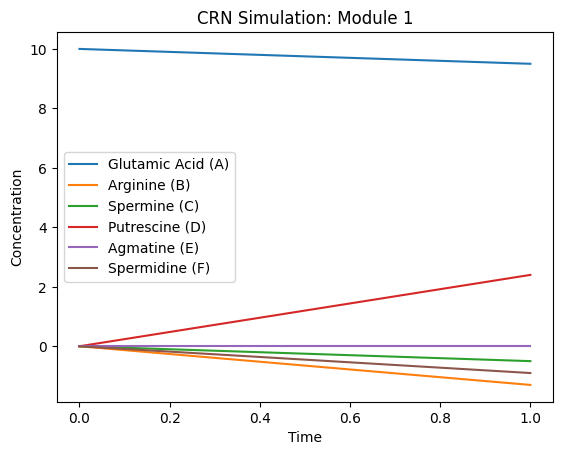

In [21]:
# Saving and simulating a CRN
CRN.write_sbml_file("Module_1.xml")

try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd

    # Initial conditions with correct syntax
    x0 = {
        "Glutamic_acid_cytosol": 10,
        "Arginine_cytosol": 0,
        "Ornithine_cytosol": 0,
        "Spermine_cytosol": 0,
        "Putrescine_cytosol": 0,
        "Agmatine_cytosol": 0,
        "Spermidine_cytosol": 0,
        "Arg2_enzyme": 5,
        "AsADC_enzyme": 5,
        "speB_enzyme": 5,
        "Car1_enzyme": 5,
        "Spe1_enzyme": 5,
        "Fms1_enzyme": 5  
    }

    # Timepoints for simulation
    timepoints = np.linspace(0, 1, 100)

    # Simulate using BioSCRAPE via SBML export
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)

    # Plotting selected species concentrations over time
    plt.plot(R['time'], R["Glutamic_acid_cytosol"], label="Glutamic Acid (A)")
    plt.plot(R['time'], R["Arginine_cytosol"], label="Arginine (B)")
    plt.plot(R['time'], R["Spermine_cytosol"], label="Spermine (C)")
    plt.plot(R['time'], R["Putrescine_cytosol"], label="Putrescine (D)")
    plt.plot(R['time'], R["Agmatine_cytosol"], label="Agmatine (E)")
    plt.plot(R['time'], R["Spermidine_cytosol"], label="Spermidine (F)")

    # Label and show plot
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("CRN Simulation: Module 1")
    plt.legend()
    plt.show()

except ModuleNotFoundError:
    print("Plotting or bioscrape modules not installed.")


In [22]:
R

,Glutamic_acid_cytosol,Arginine_cytosol,Ornithine_cytosol,Spermine_cytosol,Putrescine_cytosol,Agmatine_cytosol,Spermidine_cytosol,Arg2_enzyme,AsADC_enzyme,speB_enzyme,Car1_enzyme,Spe1_enzyme,Fms1_enzyme,Repressor1,Repressor2,Repressor3,time
0,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.000000
1,9.994949,-0.013131,0.008081,-0.005051,0.024242,0.0,-0.009091,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.010101
2,9.989899,-0.026263,0.016162,-0.010101,0.048485,0.0,-0.018182,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.020202
3,9.984848,-0.039394,0.024242,-0.015152,0.072727,0.0,-0.027273,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.030303
4,9.979798,-0.052525,0.032323,-0.020202,0.096970,0.0,-0.036364,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.040404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.520202,-1.247475,0.767677,-0.479798,2.303030,0.0,-0.863636,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.959596
96,9.515152,-1.260606,0.775758,-0.484848,2.327273,0.0,-0.872727,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.969697
97,9.510101,-1.273737,0.783838,-0.489899,2.351515,0.0,-0.881818,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.979798
98,9.505051,-1.286869,0.791919,-0.494949,2.375758,0.0,-0.890909,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.989899


In [23]:
from biocrnpyler import Species, Reaction, ChemicalReactionNetwork
from biocrnpyler.propensities import HillPositive, HillNegative

# Define main species
A = Species("Glutamic_acid", compartment="cytosol")
B = Species("Arginine", compartment="cytosol")
C = Species("Ornithine", compartment="cytosol")
D = Species("Spermine", compartment="cytosol")
E = Species("Putrescine", compartment="cytosol")
F = Species("Agmatine", compartment="cytosol")
G = Species("Spermidine", compartment="cytosol")

# Enzymes as activators
Arg2 = Species("Arg2_enzyme")
AsADC = Species("AsADC_enzyme")
speB = Species("speB_enzyme")
Car1 = Species("Car1_enzyme")
Spe1 = Species("Spe1_enzyme")
Fms1 = Species("Fms1_enzyme")

# Optional repressors for pathway regulation
Rep1 = Species("Repressor1")
Rep2 = Species("Repressor2")
Rep3 = Species("Repressor3")

# Hill Parameters (example values)
k_val = 1.0
K_val = 5
n_val = 2

# Reactions using HillPositive and HillNegative

# R1: Glutamic_acid + Arg2_enzyme --> Arginine (activated by Arg2)
hill1 = HillPositive(k=k_val, s1=Arg2, K=K_val, n=n_val)
R1 = Reaction([A], [B], propensity_type=hill1)

# R2: Arginine + AsADC_enzyme --> Agmatine (activated by AsADC)
hill2 = HillPositive(k=k_val, s1=AsADC, K=K_val, n=n_val)
R2 = Reaction([B], [F], propensity_type=hill2)

# R3: Agmatine + speB_enzyme --> Putrescine (activated by speB)
hill3 = HillPositive(k=k_val, s1=speB, K=K_val, n=n_val)
R3 = Reaction([F], [E], propensity_type=hill3)

# R4: Arginine + Car1_enzyme --> Ornithine (activated by Car1, repressed by Rep1)
hill4 = HillPositive(k=k_val, s1=Car1, K=K_val, n=n_val)
R4_pos = Reaction([B], [C], propensity_type=hill4)

hill4_neg = HillNegative(k=0.8, s1=Rep1, K=K_val, n=n_val)
R4_neg = Reaction([B], [C], propensity_type=hill4_neg)

# R5: Ornithine + Spe1_enzyme --> Putrescine (activated by Spe1)
hill5 = HillPositive(k=k_val, s1=Spe1, K=K_val, n=n_val)
R5 = Reaction([C], [E], propensity_type=hill5)

# R6: Spermine + Fms1_enzyme --> Spermidine (activated by Fms1)
hill6 = HillPositive(k=k_val, s1=Fms1, K=K_val, n=n_val)
R6 = Reaction([D], [G], propensity_type=hill6)

# R7: Spermidine + Fms1_enzyme --> Putrescine (activated by Fms1, repressed by Rep2)
hill7 = HillPositive(k=k_val, s1=Fms1, K=K_val, n=n_val)
R7_pos = Reaction([G], [E], propensity_type=hill7)

hill7_neg = HillNegative(k=0.9, s1=Rep2, K=K_val, n=n_val)
R7_neg = Reaction([G], [E], propensity_type=hill7_neg)

# Create CRN
CRN = ChemicalReactionNetwork(
    species=[A, B, C, D, E, F, G, Arg2, AsADC, speB, Car1, Spe1, Fms1, Rep1, Rep2, Rep3],
    reactions=[R1, R2, R3, R4_pos, R4_neg, R5, R6, R7_pos, R7_neg]
)

# Print Summary
print("MODULE 1: PUTRESCINE BIOSYNTHESIS WITH REGULATORY HILL FUNCTIONS")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print("Reactions = [")
for r in CRN.reactions:
    print(r.pretty_print())
print("]")


MODULE 1: PUTRESCINE BIOSYNTHESIS WITH REGULATORY HILL FUNCTIONS
Species = Glutamic_acid_cytosol, Arginine_cytosol, Ornithine_cytosol, Spermine_cytosol, Putrescine_cytosol, Agmatine_cytosol, Spermidine_cytosol, Arg2_enzyme, AsADC_enzyme, speB_enzyme, Car1_enzyme, Spe1_enzyme, Fms1_enzyme, Repressor1, Repressor2, Repressor3
Reactions = [
Glutamic_acid --> Arginine
 Kf = k Arg2_enzyme^n / ( K^n + Arg2_enzyme^n )
  k=1.0
  K=5
  n=2

Arginine --> Agmatine
 Kf = k AsADC_enzyme^n / ( K^n + AsADC_enzyme^n )
  k=1.0
  K=5
  n=2

Agmatine --> Putrescine
 Kf = k speB_enzyme^n / ( K^n + speB_enzyme^n )
  k=1.0
  K=5
  n=2

Arginine --> Ornithine
 Kf = k Car1_enzyme^n / ( K^n + Car1_enzyme^n )
  k=1.0
  K=5
  n=2

Arginine --> Ornithine
 Kf = k / ( 1 + (Repressor1/K)^n )
  k=0.8
  K=5
  n=2

Ornithine --> Putrescine
 Kf = k Spe1_enzyme^n / ( K^n + Spe1_enzyme^n )
  k=1.0
  K=5
  n=2

Spermine --> Spermidine
 Kf = k Fms1_enzyme^n / ( K^n + Fms1_enzyme^n )
  k=1.0
  K=5
  n=2

Spermidine --> Putres

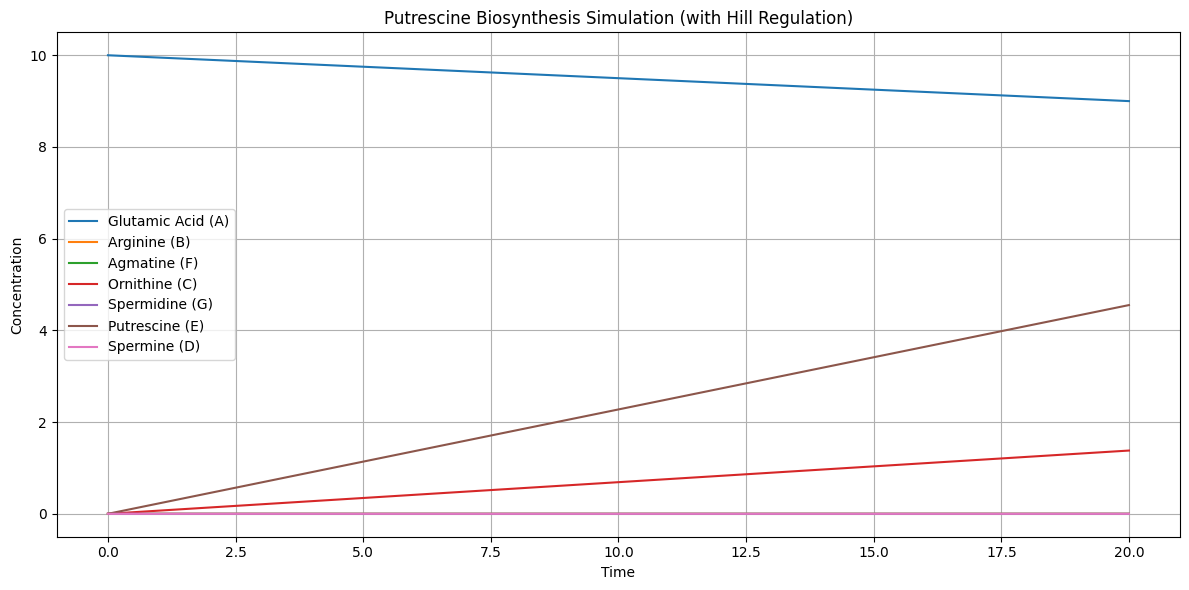

In [2]:
from biocrnpyler import Species, Reaction, ChemicalReactionNetwork
from biocrnpyler.propensities import HillPositive, HillNegative

# Define main species
A = Species("Glutamic_acid", compartment="cytosol")
B = Species("Arginine", compartment="cytosol")
C = Species("Ornithine", compartment="cytosol")
D = Species("Spermine", compartment="cytosol")
E = Species("Putrescine", compartment="cytosol")
F = Species("Agmatine", compartment="cytosol")
G = Species("Spermidine", compartment="cytosol")

# Enzymes as activators
Arg2 = Species("Arg2_enzyme")
AsADC = Species("AsADC_enzyme")
speB = Species("speB_enzyme")
Car1 = Species("Car1_enzyme")
Spe1 = Species("Spe1_enzyme")
Fms1 = Species("Fms1_enzyme")

# Repressors
Rep1 = Species("Repressor1")
Rep2 = Species("Repressor2")

# Tuned Hill parameters to avoid instability
k_val = 0.1
K_val = 5
n_val = 2

# Hill-based reactions
R1 = Reaction([A], [B], propensity_type=HillPositive(k=k_val, s1=Arg2, K=K_val, n=n_val))
R2 = Reaction([B], [F], propensity_type=HillPositive(k=k_val, s1=AsADC, K=K_val, n=n_val))
R3 = Reaction([F], [E], propensity_type=HillPositive(k=k_val, s1=speB, K=K_val, n=n_val))
R4_pos = Reaction([B], [C], propensity_type=HillPositive(k=k_val, s1=Car1, K=K_val, n=n_val))
R4_neg = Reaction([B], [C], propensity_type=HillNegative(k=0.08, s1=Rep1, K=K_val, n=n_val))
R5 = Reaction([C], [E], propensity_type=HillPositive(k=k_val, s1=Spe1, K=K_val, n=n_val))
R6 = Reaction([D], [G], propensity_type=HillPositive(k=k_val, s1=Fms1, K=K_val, n=n_val))
R7_pos = Reaction([G], [E], propensity_type=HillPositive(k=k_val, s1=Fms1, K=K_val, n=n_val))
R7_neg = Reaction([G], [E], propensity_type=HillNegative(k=0.09, s1=Rep2, K=K_val, n=n_val))

# Build CRN
CRN = ChemicalReactionNetwork(
    species=[A, B, C, D, E, F, G, Arg2, AsADC, speB, Car1, Spe1, Fms1, Rep1, Rep2],
    reactions=[R1, R2, R3, R4_pos, R4_neg, R5, R6, R7_pos, R7_neg]
)

# Export SBML
CRN.write_sbml_file("Module_1.xml")

# Simulation
try:
    import bioscrape
    import numpy as np
    import pandas as pd
    import pylab as plt

    # Initial concentrations
    x0 = {
        "Glutamic_acid_cytosol": 10,
        "Arginine_cytosol": 0,
        "Ornithine_cytosol": 0,
        "Spermine_cytosol": 0,
        "Putrescine_cytosol": 0,
        "Agmatine_cytosol": 0,
        "Spermidine_cytosol": 0,
        "Arg2_enzyme": 5,
        "AsADC_enzyme": 5,
        "speB_enzyme": 5,
        "Car1_enzyme": 5,
        "Spe1_enzyme": 5,
        "Fms1_enzyme": 5,
        "Repressor1": 2,
        "Repressor2": 2
    }

    # More detailed time points
    timepoints = np.linspace(0, 20, 2000)

    # Run simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)

    # Ensure no negative values
    R = R.clip(lower=0)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(R['time'], R["Glutamic_acid_cytosol"], label="Glutamic Acid (A)")
    plt.plot(R['time'], R["Arginine_cytosol"], label="Arginine (B)")
    plt.plot(R['time'], R["Agmatine_cytosol"], label="Agmatine (F)")
    plt.plot(R['time'], R["Ornithine_cytosol"], label="Ornithine (C)")
    plt.plot(R['time'], R["Spermidine_cytosol"], label="Spermidine (G)")
    plt.plot(R['time'], R["Putrescine_cytosol"], label="Putrescine (E)")
    plt.plot(R['time'], R["Spermine_cytosol"], label="Spermine (D)")

    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Putrescine Biosynthesis Simulation (with Hill Regulation)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except ModuleNotFoundError:
    print("Missing bioscrape or plotting modules.")


In [ ]:
from biocrnpyler import Species, Reaction, ChemicalReactionNetwork

# Define species
A = Species("Putrescine", compartment = "cytosol")
B = Species("N_methylputrescine", compartment = "cytosol")
C = Species("4_Methylaminobutanal", material_type="intermediate",compartment = "cytosol")
D = Species("N_Methyl_Δ1_pyrrolinium",compartment = "cytosol")
E = Species("4_1_Methyl_2_pyrrodinyl_3_oxobutanoic_acids", material_type="intermediate",compartment = "cytosol")
F = Species("Tropinone",compartment = "cytosol")
G = Species("Tropine",compartment = "cytosol")

# Enzymes
AbPMT1= Species("AbPMT1_enzyme",compartment = "cytosol")
DsPMT1 = Species("DsPMT1_enzyme",compartment = "cytosol")
DmMPO1ΔC_PTS1 = Species("DmMPO1ΔC_PTS1_enzyme",compartment = "peroxisome")
AbPYKS = Species("AbPYKS_enzyme_and_2x_malonyl_CoA_molecules",compartment = "cytosol")
AbCYP82M3 = Species("AbCYP82M3_enzyme", compartment = "ER") 
AtATR1 = Species("AtATR1_enzyme", compartment = "ER") 
DsTR1 = Species("DsTR1_enzyme", compartment = "cytosol") 

# Reaction rates
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0
k5 = 1.0

# Step 1: Putrescine → N-Methylputrescine
R1 = Reaction.from_massaction([A, AbPMT1,DsPMT1 ], [B], k_forward=k1)

# Step 2: N-methylputrescine → 4-Methylaminobutanal (This step occurs in the Peroxisome)
R2 = Reaction.from_massaction([B, DmMPO1ΔC_PTS1], [C], k_forward=k2)

# Step 3: 4-Methylaminobutanal → N-Methyl-Δ1-pyrrolinium (Reaction occurs spontaneously)
R3 = Reaction.from_massaction([C], [D], k_forward=k3)


# Step 4: N-Methyl-Δ1-pyrrolinium → 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids (Intermidiate) → Tropinone
# ^ this reaction (ring formation) occurs in the ER
R4 = Reaction.from_massaction([D, AbPYKS], [E], k_forward=k4)
R5 = Reaction.from_massaction([E,AbCYP82M3, AtATR1], [F], k_forward=k4)

# Step 5:Tropinone → Tropine
R6 = Reaction.from_massaction([F, DsTR1], [G], k_forward=k5)

# Create CRN
CRN = ChemicalReactionNetwork(
    species=[A, B, C, D, E, F, G, AbPMT1, DsPMT1, DmMPO1ΔC_PTS1, AbPYKS, AbCYP82M3, AtATR1, DsTR1],
    reactions=[R1, R2, R3, R4, R5, R6])

# Custom output with parallel reaction labeling
print ("MODULE 2: TROPINE BIOSYNTHESIS")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print("Reactions = [")
print("\tStep 1: Putrescine → N-Methylputrescine")
print(f"\t{R1}")  # Putrescine + AbPMT1_enzyme + DsPMT1_enzyme --> N-methylputrescine

#Blank Line
print()

# Step 2: N-methylputrescine → 4-Methylaminobutanal (This step occurs in the Peroxisome)
print("\tStep 2: N-methylputrescine → 4-Methylaminobutanal *Occurs in Peroxisome*")
print(f"\t{R2}")  # N-methylputrescine + DmMPO1ΔC-PTS1_enzyme --> 4-Methylaminobutanal

#Blank Line
print()

# Step 3: 4-Methylaminobutanal → N-Methyl-Δ1-pyrrolinium (Reaction occurs spontaneously)
print("\tStep 3: 4-Methylaminobutanal → N-Methyl-Δ1-pyrrolinium (Spontaneous)")
print(f"\t{R3}")  # 4-Methylaminobutanal --> N-Methyl-Δ1-pyrrolinium

#Blank Line
print()

# Step 4: N-Methyl-Δ1-pyrrolinium → 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids (Intermidiate) → Tropinone
print("\tStep 4: N-Methyl-Δ1-pyrrolinium → 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids (Intermidiate) → Tropinone *Occurs in the ER*")
print(f"\t{R4}")  # N-Methyl-Δ1-pyrrolinium + AbPYKS_enzyme + 2x_malonyl-CoA_molecules --> 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids
print(f"\t{R5}")  # 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids + AbCYP82M3_enzyme + AtATR1_enzyme --> Tropinone

#Blank Line
print()

## Step 5:Tropinone → Tropine
print("\tStep 5:Tropinone → Tropine")
print(f"\t{R6}")  # Tropinone + DsTR1_enzyme --> Tropine
print("]")

MODULE 2: TROPINE BIOSYNTHESIS
Species = Putrescine_cytosol, N_methylputrescine_cytosol, intermediate_4_Methylaminobutanal_cytosol, N_Methyl_Δ1_pyrrolinium_cytosol, intermediate_4_1_Methyl_2_pyrrodinyl_3_oxobutanoic_acids_cytosol, Tropinone_cytosol, Tropine_cytosol, AbPMT1_enzyme_cytosol, DsPMT1_enzyme_cytosol, DmMPO1ΔC_PTS1_enzyme_peroxisome, AbPYKS_enzyme_and_2x_malonyl_CoA_molecules_cytosol, AbCYP82M3_enzyme_ER, AtATR1_enzyme_ER, DsTR1_enzyme_cytosol
Reactions = [
	Step 1: Putrescine → N-Methylputrescine
	Putrescine+AbPMT1_enzyme+DsPMT1_enzyme --> N_methylputrescine

	Step 2: N-methylputrescine → 4-Methylaminobutanal *Occurs in Peroxisome*
	N_methylputrescine+DmMPO1ΔC_PTS1_enzyme --> intermediate[4_Methylaminobutanal]

	Step 3: 4-Methylaminobutanal → N-Methyl-Δ1-pyrrolinium (Spontaneous)
	intermediate[4_Methylaminobutanal] --> N_Methyl_Δ1_pyrrolinium

	Step 4: N-Methyl-Δ1-pyrrolinium → 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids (Intermidiate) → Tropinone *Occurs in the ER*
	N_Met

In [13]:
from biocrnpyler import Species, Reaction, ChemicalReactionNetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model

# Define species
A = Species("Putrescine", compartment="cytosol")
B = Species("N_methylputrescine", compartment="cytosol")
C = Species("4_Methylaminobutanal", material_type="intermediate", compartment="cytosol")
D = Species("N_Methyl_Δ1_pyrrolinium", compartment="cytosol")
E = Species("4_1_Methyl_2_pyrrodinyl_3_oxobutanoic_acids", material_type="intermediate", compartment="cytosol")
F = Species("Tropinone", compartment="cytosol")
G = Species("Tropine", compartment="cytosol")

# Enzymes (add material_type="enzyme" for correctness)
AbPMT1 = Species("AbPMT1_enzyme", material_type="enzyme", compartment="cytosol")
DsPMT1 = Species("DsPMT1_enzyme", material_type="enzyme", compartment="cytosol")
DmMPO1ΔC_PTS1 = Species("DmMPO1ΔC_PTS1_enzyme", material_type="enzyme", compartment="peroxisome")
AbPYKS = Species("AbPYKS_enzyme_and_2x_malonyl_CoA_molecules", material_type="enzyme", compartment="cytosol")
AbCYP82M3 = Species("AbCYP82M3_enzyme", material_type="enzyme", compartment="ER")
AtATR1 = Species("AtATR1_enzyme", material_type="enzyme", compartment="ER")
DsTR1 = Species("DsTR1_enzyme", material_type="enzyme", compartment="cytosol")

# Reaction rates
k1 = 3.0
k2 = 1.4
k3 = 1.0
k4 = 1.0
k5 = 1.0

# Reactions
R1 = Reaction.from_massaction([A, AbPMT1, DsPMT1], [B], k_forward=k1)
R2 = Reaction.from_massaction([B, DmMPO1ΔC_PTS1], [C], k_forward=k2)
R3 = Reaction.from_massaction([C], [D], k_forward=k3)
R4 = Reaction.from_massaction([D, AbPYKS], [E], k_forward=k4)
R5 = Reaction.from_massaction([E, AbCYP82M3, AtATR1], [F], k_forward=k4)
R6 = Reaction.from_massaction([F, DsTR1], [G], k_forward=k5)

# Build CRN
CRN = ChemicalReactionNetwork(
    species=[A, B, C, D, E, F, G, AbPMT1, DsPMT1, DmMPO1ΔC_PTS1, AbPYKS, AbCYP82M3, AtATR1, DsTR1],
    reactions=[R1, R2, R3, R4, R5, R6]
)

# Export SBML file
CRN.write_sbml_file("Module_2_Tropine_Pathway.xml")

try:
    import bioscrape
    import numpy as np
    import pandas as pd
    import pylab as plt


# Initial conditions (species names must match those in SBML: name + _ + compartment)
x0 = {
    "Putrescine_cytosol": 10,
    "N_methylputrescine_cytosol": 0,
    "4_Methylaminobutanal_cytosol": 0,
    "N_Methyl_Δ1_pyrrolinium_cytosol": 0,
    "4_1_Methyl_2_pyrrodinyl_3_oxobutanoic_acids_cytosol": 0,
    "Tropinone_cytosol": 0,
    "Tropine_cytosol": 0,
    "AbPMT1_enzyme_cytosol": 5,
    "DsPMT1_enzyme_cytosol": 5,
    "DmMPO1ΔC_PTS1_enzyme_peroxisome": 5,
    "AbPYKS_enzyme_and_2x_malonyl_CoA_molecules_cytosol": 5,
    "AbCYP82M3_enzyme_ER": 5,
    "AtATR1_enzyme_ER": 5,
    "DsTR1_enzyme_cytosol": 5
}

# Simulation timepoints
timepoints = np.linspace(0, 30, 3000)

 R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)


    # Ensure no negative values
    R = R.clip(lower=0)


# Plotting
plt.figure(figsize=(12, 7))
plt.plot(results_df['time'], results_df["Putrescine_cytosol"], label="Putrescine")
plt.plot(results_df['time'], results_df["N_methylputrescine_cytosol"], label="N-methylputrescine")
plt.plot(results_df['time'], results_df["Tropinone_cytosol"], label="Tropinone")
plt.plot(results_df['time'], results_df["Tropine_cytosol"], label="Tropine")

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Tropine Biosynthesis Simulation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


SyntaxError: expected 'except' or 'finally' block (2129553544.py, line 58)